In [1]:
# Importar bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
# Carregar dados
df = pd.read_csv('customer_churn.csv')

# Visualizar primeiras linhas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
# Estatísticas descritivas
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [17]:
# Verificar valores nulos
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

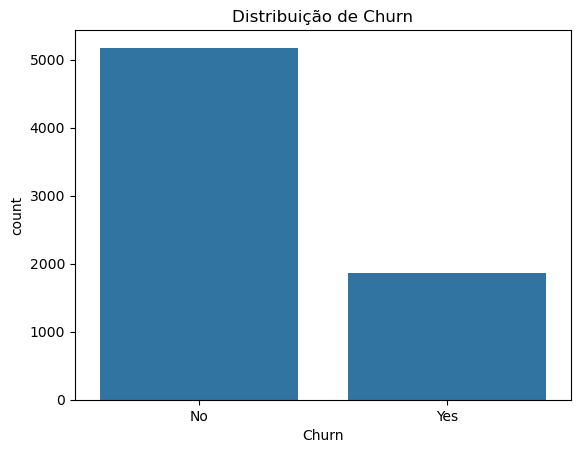

In [18]:
# Visualizar distribuição do churn
sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Churn')
plt.show()

In [41]:
# Codificar variáveis categóricas
categorical_columns = ['gender', 'PaymentMethod']
existing_columns = [col for col in categorical_columns if col in df.columns]
if existing_columns:
    df = pd.get_dummies(df, columns=existing_columns, drop_first=True)
else:
    print(f'As colunas {categorical_columns} não estão presentes no DataFrame.')

As colunas ['gender', 'PaymentMethod'] não estão presentes no DataFrame.


In [49]:
# Converter a coluna TotalCharges para numérico, substituindo valores inválidos por NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Preencher valores NaN com 0 ou outro valor apropriado
df['TotalCharges'].fillna(0, inplace=True)

# Normalizar variáveis numéricas
existing_numerical_cols = [col for col in numerical_cols if col in df.columns]
if existing_numerical_cols:
    df[existing_numerical_cols] = scaler.fit_transform(df[existing_numerical_cols])
else:
    print(f'As colunas {numerical_cols} não estão presentes no DataFrame.')

C:\Users\osnif\AppData\Local\Temp\ipykernel_17748\3457550980.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [ ]:
# Dividir dados em treino e teste
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Remover colunas não numéricas de X_train e X_test
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# Treinar modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

[[1351  188]
 [ 305  269]]
              precision    recall  f1-score   support

          No       0.82      0.88      0.85      1539
         Yes       0.59      0.47      0.52       574

    accuracy                           0.77      2113
   macro avg       0.70      0.67      0.68      2113
weighted avg       0.75      0.77      0.76      2113



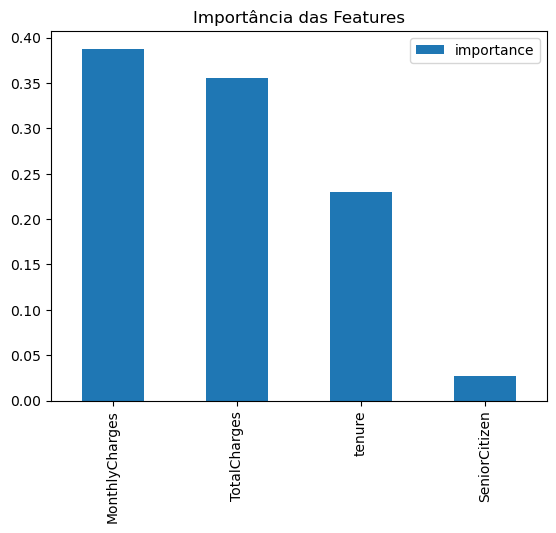

In [57]:
# Matriz de confusão
print(confusion_matrix(y_test, y_pred))

# Relatório de classificação
print(classification_report(y_test, y_pred))

# Importância das features
feature_importances = pd.DataFrame(model.feature_importances_,
                                 index = X_train.columns,
                                 columns=['importance']).sort_values('importance', ascending=False)
feature_importances.plot(kind='bar')
plt.title('Importância das Features')
plt.show()